<a href="https://colab.research.google.com/github/BrandonPalacios/Fraudelent_Transaction_Detection/blob/main/Fraudulent_Transactions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

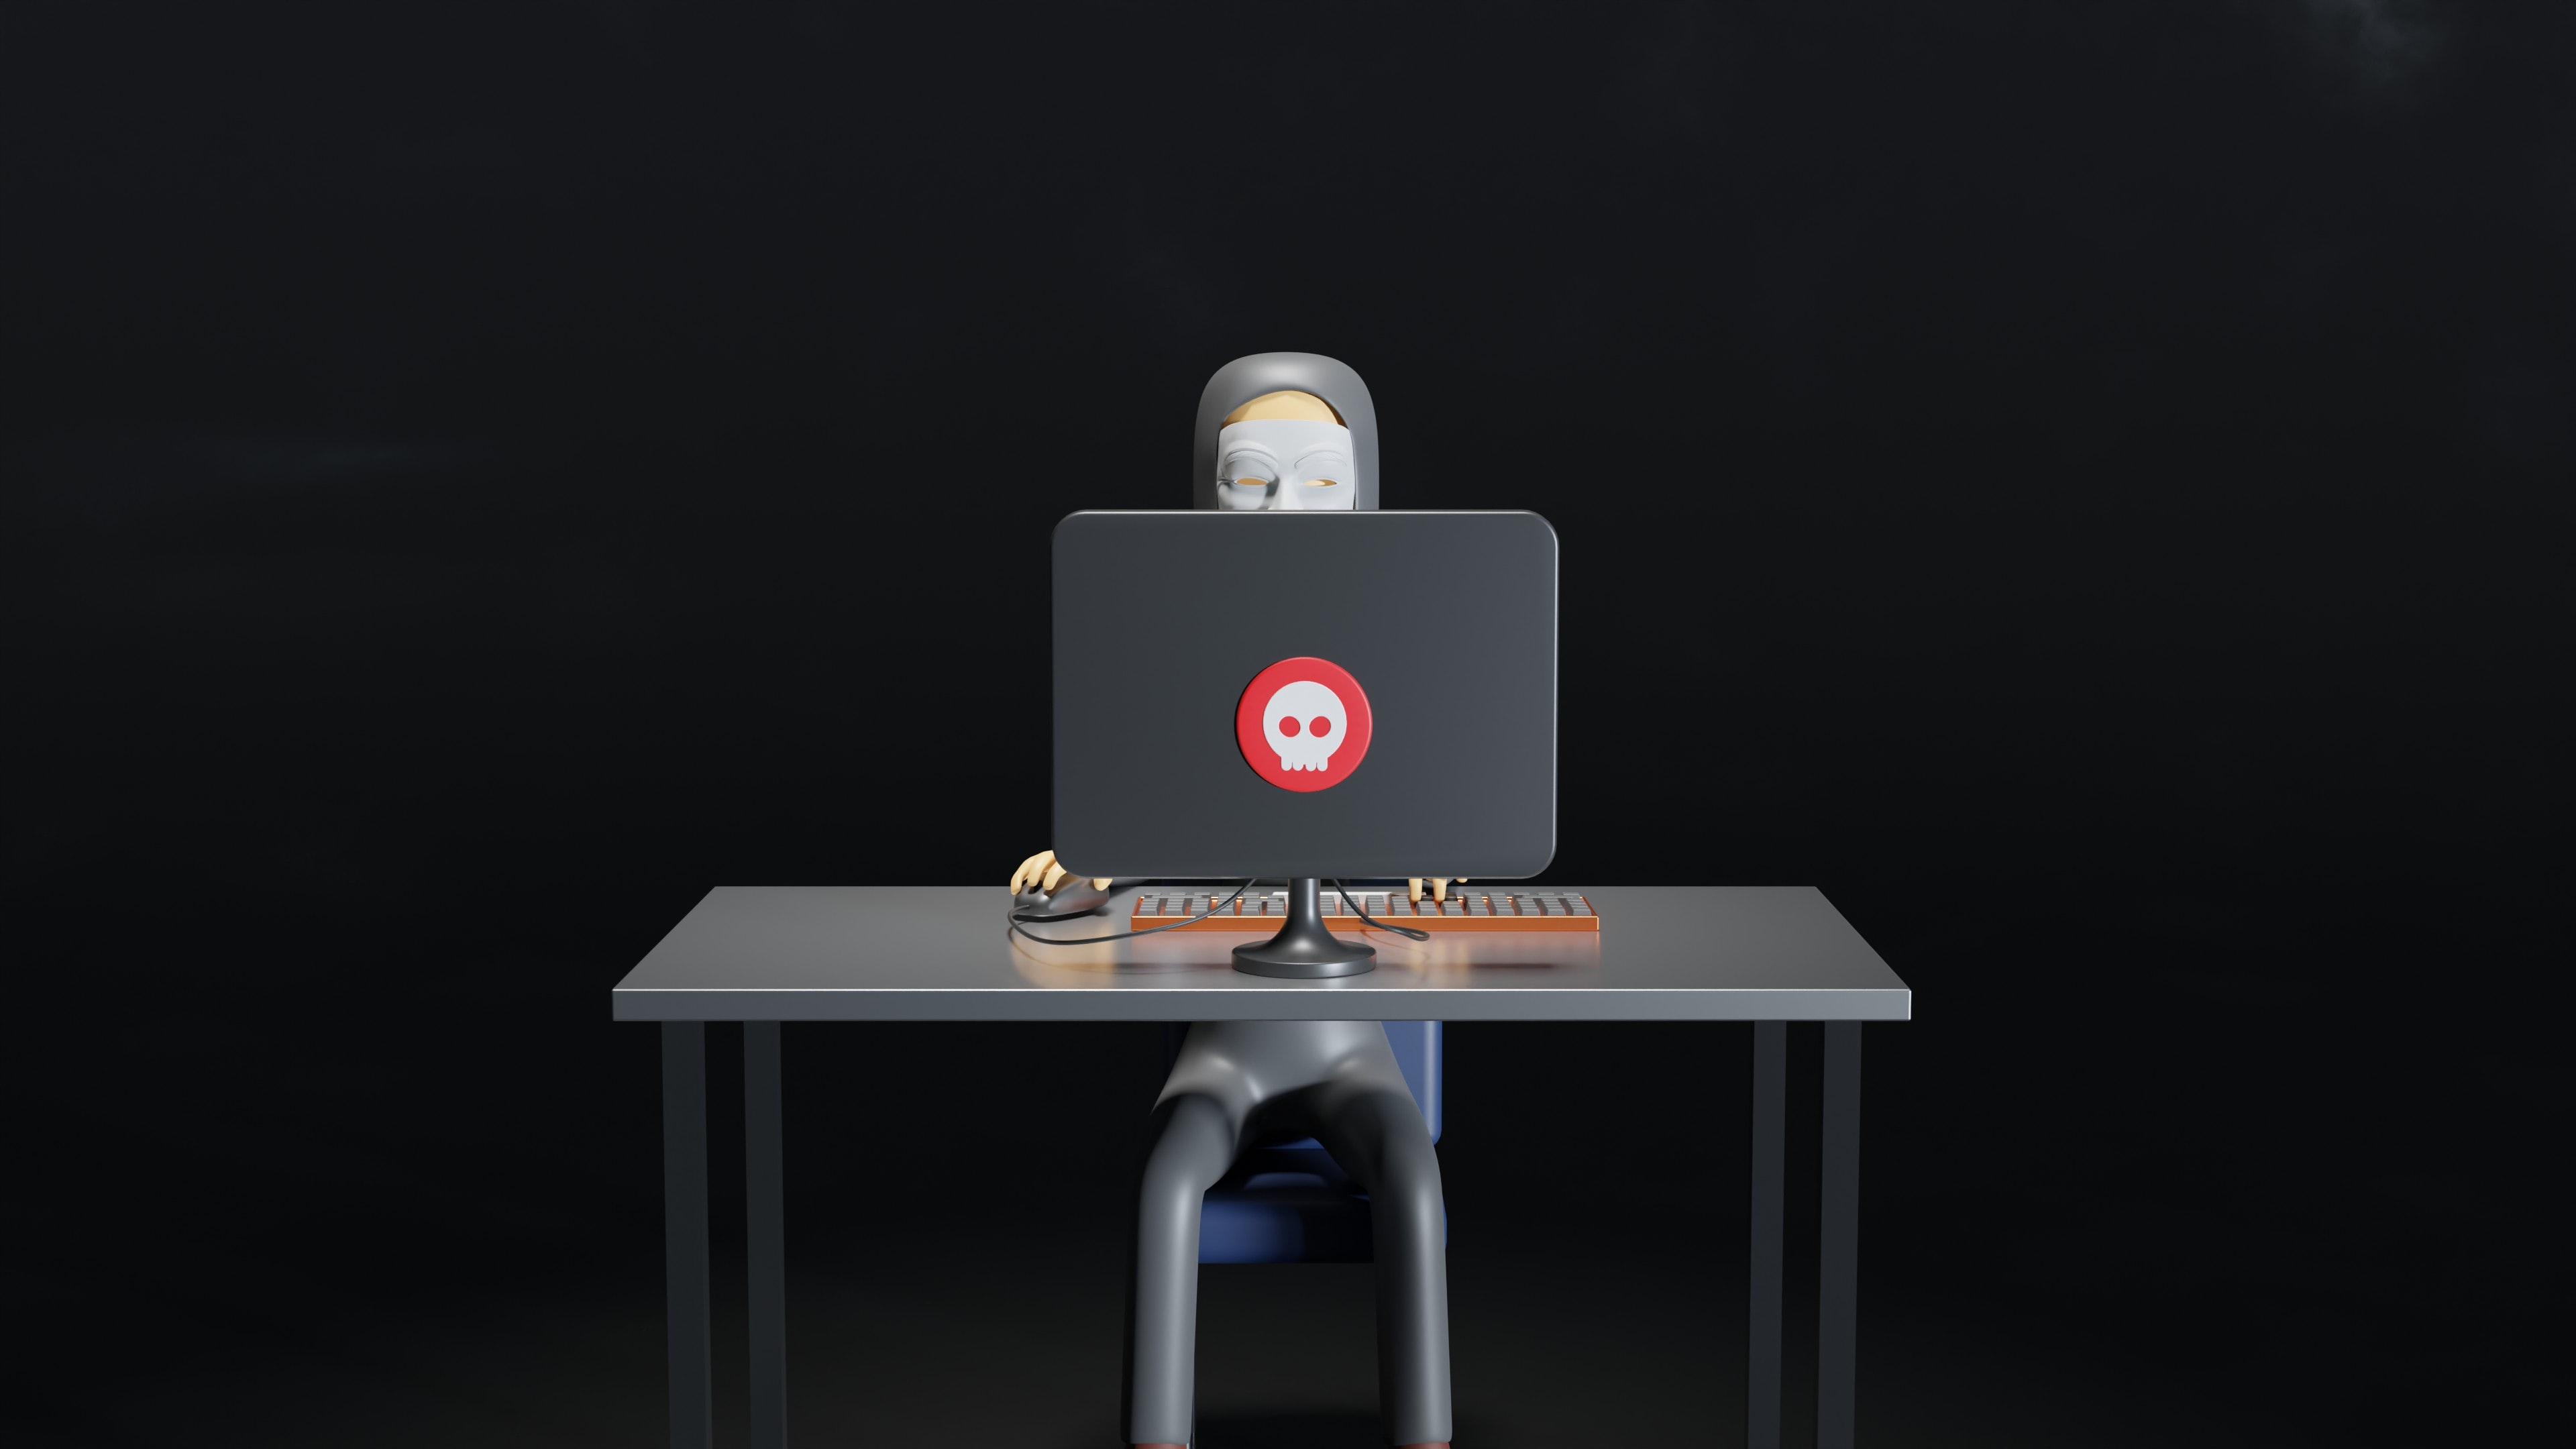

# Fraudulent Transactions Detection

Recognizing fraudulent transactions from legitimate ones has been a challenge for businesses, it has become a daily activity for all companies, especially the technological ones.

**Some of the key benefits of Fraud Detection are:**
- **Protect the business' reputation.** Reduces the risks of you ever seeing your company’s name publicly spoiled because of fraud.
- **Improve customer satisfaction.** You secure your customers' personal information.
- **Prevent unauthorized transactions.**

This analysis' target is to develop an efficient model to predict if a transaction is probable to be fraudulent unsing the algorithm Support Vector Machine & KNN.

The dataset consists of 1.75 million transactions made by considering simulated users through various terminals throughout the period from January 2023 to June 2023.

## Data Introduction
- **ID:** Represents row number of the transaction in the data.
- **TRANSACTION_ID:** Represents a unique identifier for each transaction.
- **TX_DATETIME:** Represents the date and time of the transaction.
- **CUSTOMER_ID:** Represents the unique identifier of the customer who made the transaction.
- **TERMINAL_ID:** Represents the unique identifier of the terminal where the transaction was made.
- **TX_AMOUNT:** Represents the amount of the transaction.
- **TX_TIME_SECONDS:** Represents the duration of the transaction in seconds.
- **TX_TIME_DAYS:** Represents the duration of the transaction in days.
- **TX_FRAUD:** indicates whether the transaction is fraudulent or not, with 0 representing a legitimate transaction and 1 representing a fraudulent transaction.
- **TX_FRAUD_SCENARIO:** represents the type of fraudulent scenario that was identified, if any. A value of 0 indicates no fraud, and other values indicate different types of fraud scenarios.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [2]:
# Load of the Dataset from Kaggle.
from google.colab import files
!pip install -q Kaggle

In [3]:
# Load of the Kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# Download the dataset
!kaggle datasets download -d sanskar457/fraud-transaction-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
# Move the dataset to the correct site.
!mv kaggle.json /root/.kaggle/kaggle.json

In [6]:
# Download the dataset again
!kaggle datasets download -d sanskar457/fraud-transaction-detection

 71% 24.0M/34.0M [00:00<00:00, 88.7MB/s]
100% 34.0M/34.0M [00:00<00:00, 95.4MB/s]


In [7]:
# Unzip de dataset
!unzip fraud-transaction-detection.zip

Archive:  fraud-transaction-detection.zip
  inflating: Final Transactions.csv  


## Exploratory Analysis

In [8]:
# Create the new variable 'data' with the dataset.
data = pd.read_csv('Final Transactions.csv')

In [9]:
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1754155.0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
TRANSACTION_ID,1754155.0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
CUSTOMER_ID,1754155.0,2.504011e+03,1.445987e+03,0.0,1252.00,2506.00,3.765000e+03,4999.0
TERMINAL_ID,1754155.0,4.996733e+03,2.886101e+03,0.0,2502.00,4994.00,7.495000e+03,9999.0
TX_AMOUNT,1754155.0,5.396820e+02,1.179711e+03,0.0,179.95,421.75,7.505950e+02,647837.5
TX_TIME_SECONDS,1754155.0,7.903234e+06,4.565172e+06,31.0,3940846.50,7902670.00,1.186566e+07,15811197.0
TX_TIME_DAYS,1754155.0,9.097260e+01,5.283709e+01,0.0,45.00,91.00,1.370000e+02,182.0
TX_FRAUD,1754155.0,1.345200e-01,3.412103e-01,0.0,0.00,0.00,0.000000e+00,1.0
TX_FRAUD_SCENARIO,1754155.0,1.449746e-01,3.874872e-01,0.0,0.00,0.00,0.000000e+00,3.0


In [12]:
data.isnull().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

### Visual Analysis

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64


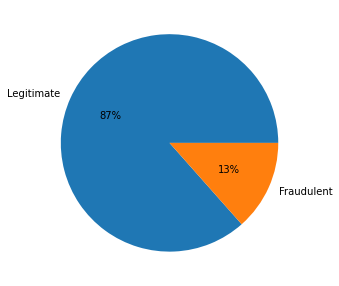

In [13]:
# Distribution of the fraudulent transactions.
a, b = data['TX_FRAUD'].value_counts()
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pie([a, b], labels=['Legitimate', 'Fraudulent'], autopct='%1.0f%%')
print(data['TX_FRAUD'].value_counts())

For the 1.75 million of transactions of the dataset, the 13% have been fraudulent transactions.

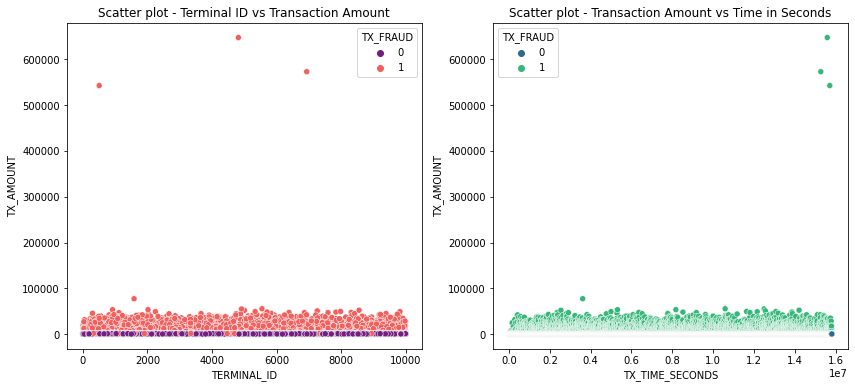

In [14]:
f=  plt.figure(figsize=(14,6))
ax= f.add_subplot(121)
sns.scatterplot (x= 'TERMINAL_ID', y= 'TX_AMOUNT', data= data, palette= 'magma', hue= 'TX_FRAUD', ax= ax)
ax.set_title('Scatter plot - Terminal ID vs Transaction Amount')

ax= f.add_subplot(122)
sns.scatterplot(x= 'TX_TIME_SECONDS', y= 'TX_AMOUNT', data= data, palette= 'viridis', hue= 'TX_FRAUD')
ax.set_title('Scatter plot - Transaction Amount vs Time in Seconds')
plt.savefig('sc.png')

We can notice that the Fraudulent transaction are always for high amounts; which give us the first insight, if the amoun of a transaction is above the average, most likely is a Fraudulent transaction.

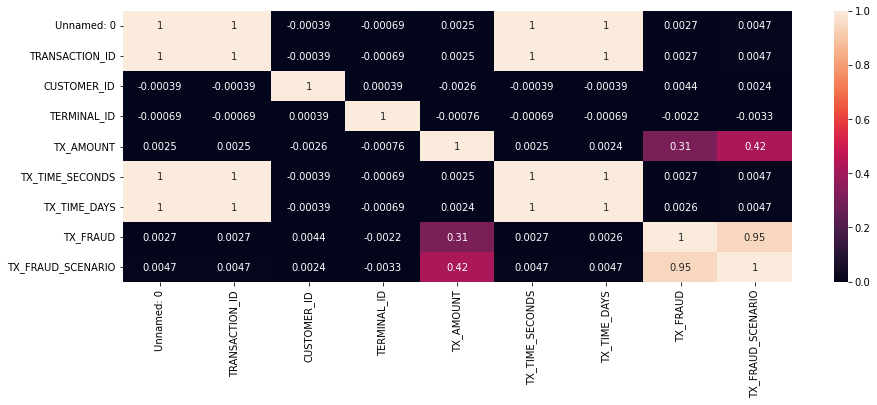

In [15]:
# Review of the correlation of the numerical variables.
corr= data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot= True);

In [16]:
# Eliminate the column 'TX_FRAUD_SCENARIO' as it has a high correlation with our traget variable 'TX_FRAUD'.
data = data.drop('TX_FRAUD_SCENARIO', axis=1)
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0


In [17]:
# Remove the columns that are not useful to the model.
data = data.drop(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID','TERMINAL_ID'], axis=1)
data.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
0,533.07,31,0,0
1,808.56,130,0,0
2,1442.94,476,0,1
3,620.65,569,0,0
4,490.66,634,0,0


## Train and validation for the SVM Algorithm.


In [18]:
# Prepare the data for the model
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'TX_FRAUD']
y = X = data.loc[:, data.columns == 'TX_FRAUD']

# Assign a value of 0.3 for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=0)

In [19]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Adjust the model with the hyperparameters obtained from the Grid Search function.
# SVM Linear
svmLinear = svm.SVC(C = 1 
                    ,kernel='linear'
                    ,probability = True) 

# Ajust the model
svmLinear.fit(X_train, y_train)

# Validation with the test set
y_proba_train_svm = svmLinear.predict_proba(X_train)
y_proba_test_svm = svmLinear.predict_proba(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Training
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
# 
# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

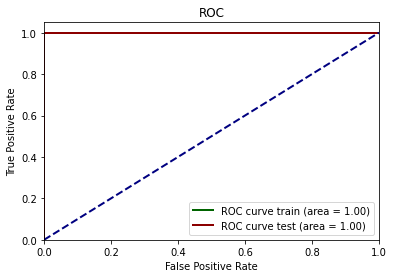

In [22]:
# Curve ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [23]:
# Predictions test
prediction_train = svmLinear.predict(X_train)
prediction_test = svmLinear.predict(X_test)

The accuracy of the training is: 100.0%

The accuracy of the test is: 100.0%

Prediction       0      1
Real                     
0           455799      0
1                0  70448


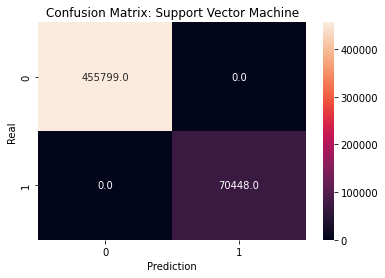

In [24]:
# Verify the accuracy of the model
accuracy = accuracy_score(y_true = y_train,y_pred = prediction_train,normalize = True)
print(f"The accuracy of the training is: {100*accuracy}%")
print()
accuracy = accuracy_score(y_true = y_test,y_pred = prediction_test,normalize = True)
print(f"The accuracy of the test is: {100*accuracy}%")
print()
# confusion Matrix
confusion_matrix = pd.crosstab(
    y_test.TX_FRAUD.ravel(),
    prediction_test,
    rownames=['Real'],
    colnames=['Prediction']
)
cm_sns = sns.heatmap(confusion_matrix, annot=True, fmt='.1f')
cm_sns.set_title('Confusion Matrix: Support Vector Machine')
print(confusion_matrix)

## Train and Validation for the KNN Algorithm


In [25]:
# Prepare the data for the model
X_knn = data.loc[:, data.columns != 'TX_FRAUD']
y_knn = X = data.loc[:, data.columns == 'TX_FRAUD']

In [26]:
# Assign a value of 0.3 for the test set.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size= 0.30, random_state=0)

In [27]:
# Using Normalizer to the variables.
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train_knn) 

normalized_X_train= scaler.transform(X_train_knn)
normalized_X_test= scaler.transform(X_test_knn)

In [34]:
# Implementation of the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

K = 5 
knn=KNeighborsClassifier(n_neighbors= K)
knn.fit(normalized_X_train, y_train_knn)
y_pred= knn.predict(normalized_X_test)
print(y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 1 0 ... 1 0 0]


The accuracy of the test is: 88.26463618794976%

Prediction       0      1
Real                     
0           427372  28427
1            33330  37118


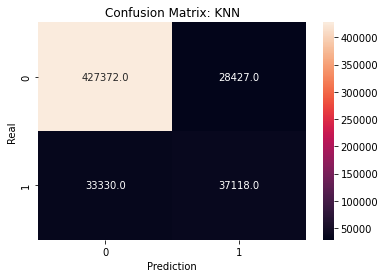

In [35]:
# Verify the accuracy of the model
accuracy = accuracy_score(y_true = y_test,y_pred = y_pred,normalize = True)
print(f"The accuracy of the test is: {100*accuracy}%")
print()
# confusion Matrix
confusion_matrix_knn = pd.crosstab(
    y_test_knn.TX_FRAUD.ravel(),
    y_pred,
    rownames=['Real'],
    colnames=['Prediction']
)
cm_sns = sns.heatmap(confusion_matrix_knn, annot=True, fmt='.1f')
cm_sns.set_title('Confusion Matrix: KNN')
print(confusion_matrix_knn)

**After verifying both models, we can conclude that we have a precise model predicting Fraudulent Transactions with the Support Vector Machine Algorithm.**